# Task -1 Anomaly detection
## Student ID1:318636693
## Student ID2:318765856
### some notes: you can install Anaconda (python 3 prefered)
####We will use Pandas, Numpy, and SKLEARN ( they are part of Anaconda distribution)

In [95]:
!pip install oletools

You should consider upgrading via the 'c:\users\shira\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [96]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shira\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [97]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shira\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [98]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shira\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [99]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\shira\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [100]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings


# Hi This is me

In [101]:
y = 2+5
print(y)

7


In [102]:
print("this is  Y:",y)

this is  Y: 7


To read dataframe we will use Pandas.  Try pd. (press Tab -> will show you options)

In [103]:
pd.array([1,2,3])

<IntegerArray>
[1, 2, 3]
Length: 3, dtype: Int64

## Read the data

In [104]:
# file path - this for linux windows you will need "//"
f_path = r".\conn_attack.csv"
'''
record ID - The unique identifier for each connection record.
duration_  This feature denotes the number of seconds (rounded) of the connection. For example, a connection for 0.17s or 0.3s would be indicated with a “0” in this field.
src_bytes This field represents the number of data bytes transferred from the source to the destination (i.e., the amount of out-going bytes from the host).
dst_bytes This fea
ture represents the number of data bytes transferred from the destination to the source (i.e., the amount of bytes received by the host).
'''
df = pd.read_csv(f_path,names=["record ID","duration_", "src_bytes","dst_bytes"], header=None)

In [105]:
# we could have nan values in the dataset (issue in the data) lets dropna()
df

record ID  duration_  src_bytes  dst_bytes
0               1          0        236       1228
1               2          0        239        486
2               3          0        234       1364
3               4          0        239       1295
4               5          0        181       5450
...           ...        ...        ...        ...
256665     256666          0        306        236
256666     256667          0        288       4017
256667     256668          0        289       1096
256668     256669          0        198       2169
256669     256670          0        212       2288

[256670 rows x 4 columns]

Get the head of the data

In [106]:
df.tail()

record ID  duration_  src_bytes  dst_bytes
256665     256666          0        306        236
256666     256667          0        288       4017
256667     256668          0        289       1096
256668     256669          0        198       2169
256669     256670          0        212       2288

In [107]:
df.head()

record ID  duration_  src_bytes  dst_bytes
0          1          0        236       1228
1          2          0        239        486
2          3          0        234       1364
3          4          0        239       1295
4          5          0        181       5450

# # Pandas DataFrame

A.  Handling missing data

In [108]:
# determin the missing data precentage
df.apply(lambda x: sum(x.isna()) / len(df))


record ID    0.0
duration_    0.0
src_bytes    0.0
dst_bytes    0.0
dtype: float64

B. Remove na/nan: 
##The Pandas function dropna() drops rows or columns (depending on the parameter you choose) that contain missing values. This function takes the axis parameter which you set as 0 to drop rows, and 1 to drop columns.

Please note that:

The alternative function is fillna() . This function will replace missing values with the value of your choice. You can replace with a fixed value such as 0, or you can use a calculation such as the mean. You can also apply different values to different columns by passing a dictionary of values per column.

In [109]:
df.shape

(256670, 4)

In [110]:
df.isnull().any().any() # check if we have nan values.

False

In [111]:
df = df.dropna()


In [112]:
df.shape

(256670, 4)

The below code fills any missing values with the mode for that column. We used fil when we have features that do not have all placement in all cases.

In [113]:
df_numeric = df.apply(lambda x: x.fillna(x.mode()),axis=0)

C. Selecting subsets from our data

The loc method selects rows based on the index label. Let’s walk through a quick example.

In [114]:
df.head()

record ID  duration_  src_bytes  dst_bytes
0          1          0        236       1228
1          2          0        239        486
2          3          0        234       1364
3          4          0        239       1295
4          5          0        181       5450

In [115]:
number_range = range(100,200)
print(number_range)

range(100, 200)


In [116]:
subset_loc = df.loc[number_range]
subset_loc.head()

record ID  duration_  src_bytes  dst_bytes
100        101          0        235       9437
101        102          0        230        506
102        103          0        230        795
103        104          0        234        261
104        105          0        236       2728

The iloc method select rows by the index position. This might be used, for example, if the user does not know the index or if the index is not numeric.


Similar to loc

In [117]:
subset_iloc = df.iloc[[0, 1, 2]]
subset_iloc.head()

record ID  duration_  src_bytes  dst_bytes
0          1          0        236       1228
1          2          0        239        486
2          3          0        234       1364

D. DataFrame "Where" The SQL alternative for searching

In [118]:
df.where(df['src_bytes'] > 240).dropna()

record ID  duration_  src_bytes  dst_bytes
30           31.0        0.0      278.0      957.0
38           39.0        0.0      257.0     1738.0
60           61.0        0.0      256.0      597.0
61           62.0        0.0      253.0     1906.0
62           63.0        0.0      254.0      555.0
...           ...        ...        ...        ...
256663   256664.0        0.0      288.0     3435.0
256664   256665.0        0.0      306.0      244.0
256665   256666.0        0.0      306.0      236.0
256666   256667.0        0.0      288.0     4017.0
256667   256668.0        0.0      289.0     1096.0

[140321 rows x 4 columns]

In [119]:
 # or /use this:
df[df['src_bytes'] > 240]

record ID  duration_  src_bytes  dst_bytes
30             31          0        278        957
38             39          0        257       1738
60             61          0        256        597
61             62          0        253       1906
62             63          0        254        555
...           ...        ...        ...        ...
256663     256664          0        288       3435
256664     256665          0        306        244
256665     256666          0        306        236
256666     256667          0        288       4017
256667     256668          0        289       1096

[140321 rows x 4 columns]

In [120]:
#or more complex:
df[(df['src_bytes']> 240) & (df['dst_bytes']> 1000)]

record ID  duration_  src_bytes  dst_bytes
38             39          0        257       1738
61             62          0        253       1906
63             64          0        256       2595
70             71          0        260       1837
71             72          0        256       1169
...           ...        ...        ...        ...
256660     256661          0        289       1435
256662     256663          0        282       2288
256663     256664          0        288       3435
256666     256667          0        288       4017
256667     256668          0        289       1096

[90108 rows x 4 columns]

E.Describe

In [121]:
df.describe()

record ID      duration_      src_bytes     dst_bytes
count  256670.000000  256670.000000  256670.000000  2.566700e+05
mean   128335.500000       0.640936     474.247898  4.473533e+03
std     74094.391134      15.627170    3391.106084  2.080903e+04
min         1.000000       0.000000       0.000000  0.000000e+00
25%     64168.250000       0.000000     217.000000  6.600000e+02
50%    128335.500000       0.000000     249.000000  1.661000e+03
75%    192502.750000       0.000000     306.000000  4.341000e+03
max    256670.000000    3289.000000   54540.000000  7.068759e+06

F. Dataset statistics calculations

In [122]:
#Mean
df['dst_bytes'].mean()

4473.532613862158

In [123]:
#Median of two seperate columns
df[["src_bytes", "dst_bytes"]].median()

src_bytes     249.0
dst_bytes    1661.0
dtype: float64

In [124]:
#Instead of the predefined statistics, specific combinations can be calculated
df.agg(
    {
        "duration_": ["min", "max", "median", "skew"],
        "dst_bytes": ["min", "max", "median", "mean"],
    }
)

duration_     dst_bytes
min        0.000000  0.000000e+00
max     3289.000000  7.068759e+06
median     0.000000  1.661000e+03
skew      74.033196           NaN
mean            NaN  4.473533e+03

G. Grouping

In [125]:
df[["src_bytes", "dst_bytes"]].groupby("src_bytes").std()

dst_bytes
src_bytes              
0           1530.729507
51             0.000000
137                 NaN
138        20112.326825
139         9572.034347
...                 ...
53208               NaN
53452       3097.127702
53776               NaN
54060       3097.127702
54540        197.062320

[473 rows x 1 columns]

In [126]:
df.groupby(["src_bytes", "dst_bytes"])["duration_"].mean()

src_bytes  dst_bytes
0          0            0.084615
           17520        0.000000
51         8127         4.500000
137        407          0.000000
138        492          0.000000
                          ...   
54060      7300         0.000000
54540      2920         0.000000
           7300         0.000000
           8314         0.092593
           8315         0.000000
Name: duration_, Length: 134353, dtype: float64

## Data exploration

### Explore the data, understand the featues, statistics visualize the inputs
#### please try the following tools and extend them: this is for a soft start :) Explain how you explore the data. Why this is important? Please note this are only some examples


skew:
    
    In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative, or undefined.


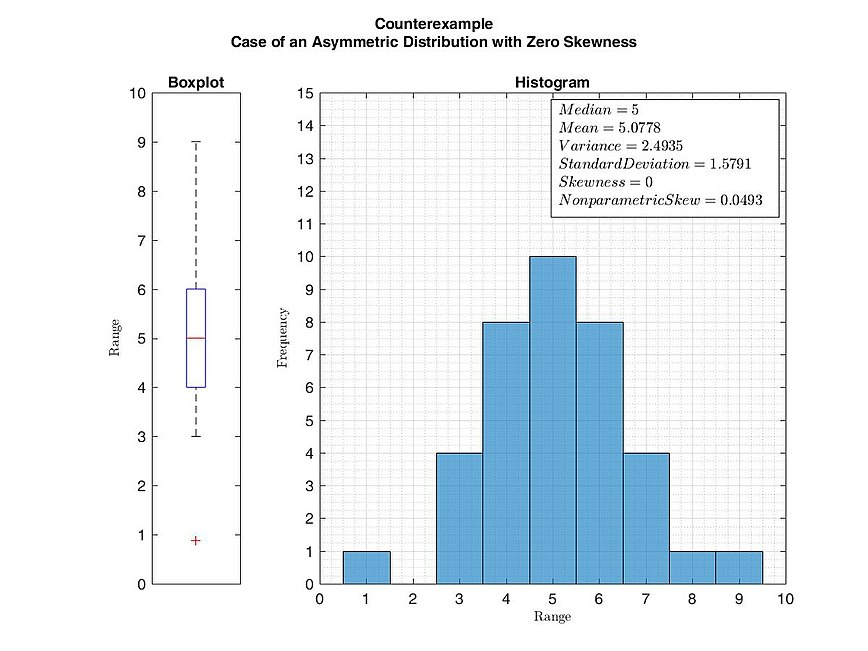

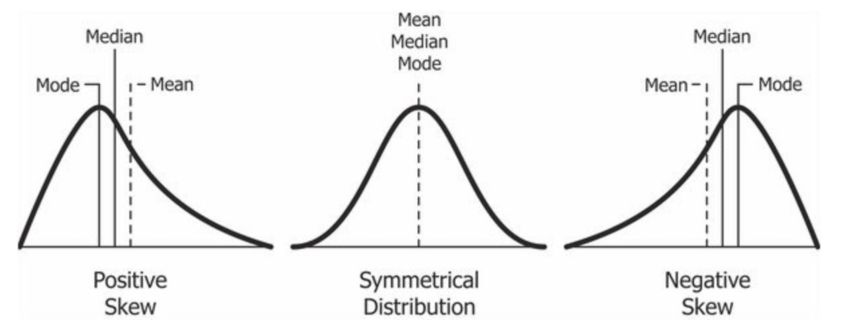

C:\Users\shira\AppData\Local\Temp\ipykernel_26632\3400833005.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['src_bytes'])


<AxesSubplot: xlabel='src_bytes', ylabel='Density'>

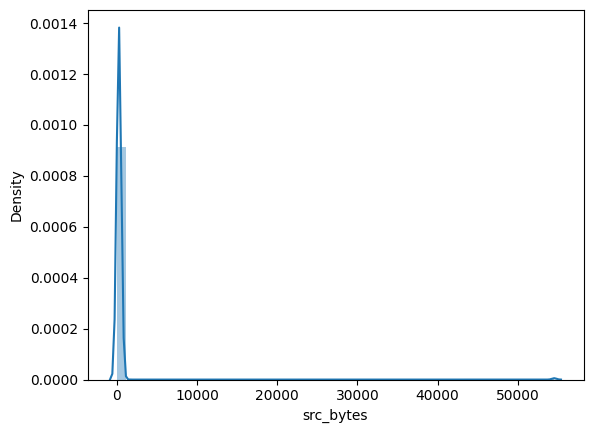

In [127]:
#histogram
sns.distplot(df['src_bytes'])

In [128]:
'''
Deviate from the normal distribution.
Have appreciable positive skewness.
Show peakedness.
'''
#skewness and kurtosis
print("Skewness: %f" % df['src_bytes'].skew())
print("Kurtosis: %f" % df['src_bytes'].kurt()) # positive show long tail , negative light tail

Skewness: 15.824471
Kurtosis: 248.739606


C:\Users\shira\AppData\Local\Temp\ipykernel_26632\1259533161.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['dst_bytes'])


Skewness: 207.100418
Kurtosis: 61028.785029


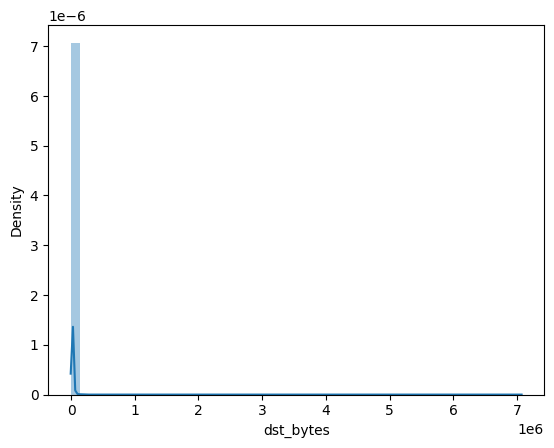

In [129]:
sns.distplot(df['dst_bytes'])
print("Skewness: %f" % df['dst_bytes'].skew())
print("Kurtosis: %f" % df['dst_bytes'].kurt())

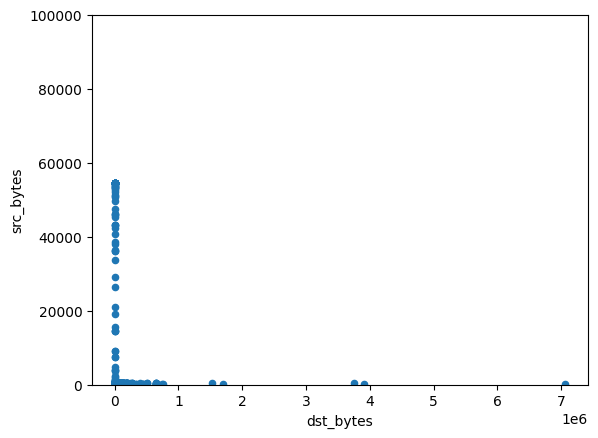

In [130]:
#Relationship with numerical variables
var = 'dst_bytes'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,100000)); # do not `assume here any thing this is just examples

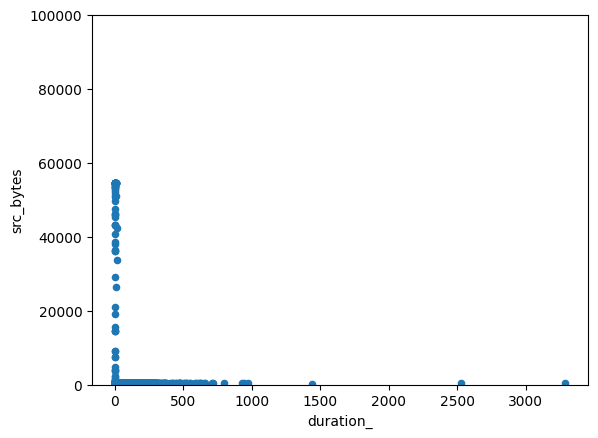

In [131]:
#scatter plot totalbsmtsf/saleprice
var = 'duration_'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,100000));


Correlation is a statistical term which in common usage refers to how close two variables are to having a linear relationship with each other.

In [132]:
df.corr() 

record ID  duration_  src_bytes  dst_bytes
record ID   1.000000   0.027244   0.019209  -0.002970
duration_   0.027244   1.000000  -0.001714  -0.005791
src_bytes   0.019209  -0.001714   1.000000   0.010770
dst_bytes  -0.002970  -0.005791   0.010770   1.000000

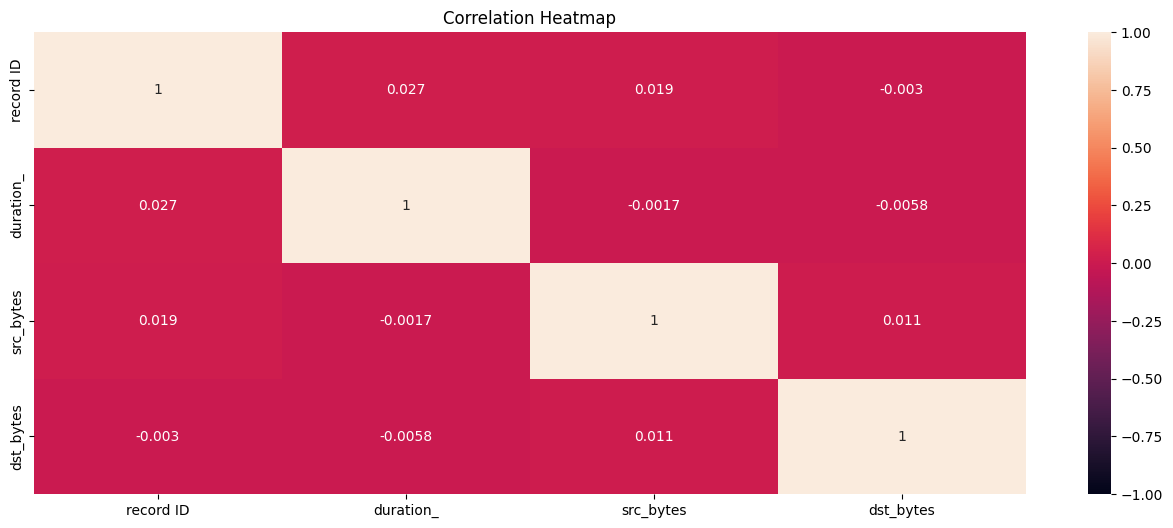

In [133]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

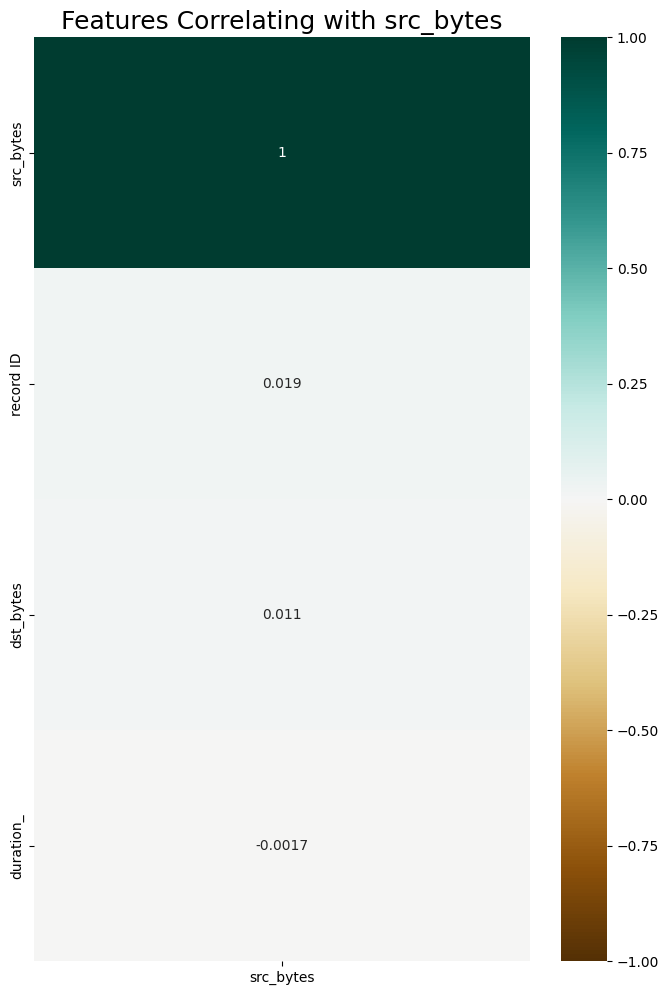

In [134]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['src_bytes']].sort_values(by='src_bytes', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with src_bytes', fontdict={'fontsize':18});

# Introduction to ML in python

I will take here a supervided dataset. The idea is to demonstrate you some concepts

In [135]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
# Load Dataset
X, y = datasets.load_iris(return_X_y=True) # note this is a known dataset with dedicated loader. In your work you can use a custom one.
X.shape, y.shape

((150, 4), (150,))

Let's split the data 80:20

In [136]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

print("Train:",X_train.shape, y_train.shape)

print("Test", X_test.shape, y_test.shape)

Train: (120, 4) (120,)
Test (30, 4) (30,)


In [137]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

X_train.shape, y_train.shape

X_test.shape, y_test.shape
'''
When evaluating different settings (“hyperparameters”) for estimators, such as the C 
setting that must be manually set for an SVM, there is still a risk of overfitting
on the test set because the parameters can be tweaked until the estimator performs optimally. 
You can optimize "C" with GridSearch.
'''

clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print('the accuracy here is :',clf.score(X_test, y_test))
#let's predict the data
y_predicted = clf.predict(X_test)
# lets review the labels
labels = np.unique(y)
print("unique labels",labels)
# The confusion matrix is:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted, labels=labels)

the accuracy here is : 0.9666666666666667
unique labels [0 1 2]


array([[16,  0,  0],
       [ 0, 22,  1],
       [ 0,  1, 20]], dtype=int64)

Here we have a problem:
    
    Our data is trained with non optimized parameters.

How can we solve it?:
     
     cross-validation  + k-Fold
     
     The k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

    A model is trained using  of the folds as training data;

    the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).
    

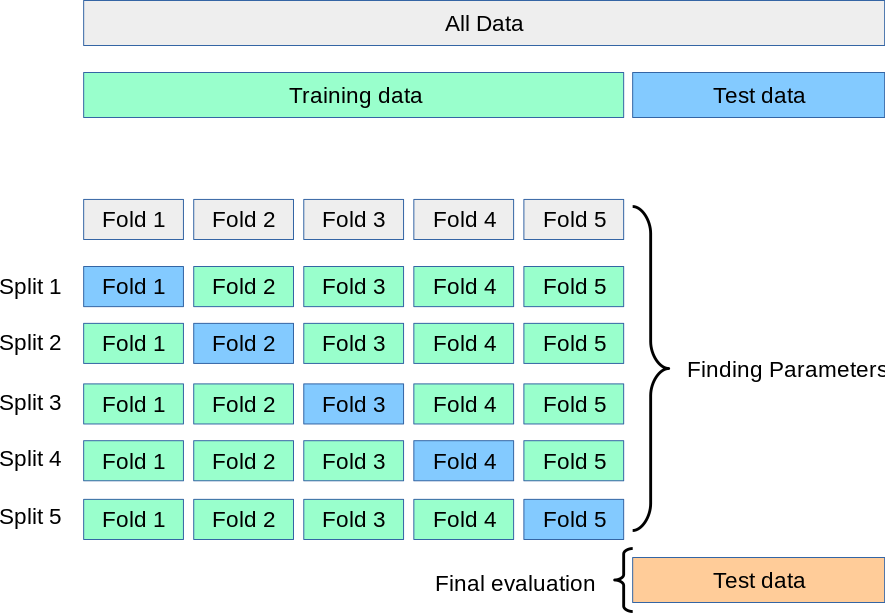

In [138]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
print("we are getting in scores the result of each iterration. Len:",len(scores), "values:", scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("NOTE: the result here are different! why? - OVERFITING")

we are getting in scores the result of each iterration. Len: 5 values: [0.96666667 1.         0.96666667 0.96666667 1.        ]
0.98 accuracy with a standard deviation of 0.02
NOTE: the result here are different! why? - OVERFITING


Now let's see how can we use data normalization with this example

In [139]:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
print("Let's see if the training size effect us ? change from 0.2 to 0.4")
#standardScaler normalization
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
print("result score: ",clf.score(X_test_transformed, y_test))


#changing:
from sklearn import preprocessing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)
print("changed")
#standardScaler normalization
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(C=1).fit(X_train_transformed, y_train)
X_test_transformed = scaler.transform(X_test)
print("result score: ",clf.score(X_test_transformed, y_test))

Let's see if the training size effect us ? change from 0.2 to 0.4
result score:  1.0
changed
result score:  0.9333333333333333


Lets write it with piplines:

In [140]:
from sklearn.pipeline import make_pipeline
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, X, y, cv=5) #note -we can use other CV methods see sklearn.


array([0.96666667, 0.96666667, 0.96666667, 0.93333333, 1.        ])

Let's try a different pipline approach

In [141]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
classifier_names = ["Logistic Regression", "KNN", "Random Forest","SVM"]

classifiers = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), LinearSVC()]

zipped_clf = zip(classifier_names,classifiers)

In [142]:
def classifier(classifier, t_train, c_train, t_test, c_test):
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('standardize', StandardScaler()),                         
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_acc = fit_classifier(checker_pipeline, t_train, c_train, t_test,c_test)
        result.append((n,clf_acc))
    return result

In [143]:
def fit_classifier(pipeline, x_train, y_train, x_test, y_test):
    model_fit = pipeline.fit(x_train, y_train)
    y_pred = model_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [144]:
result = classifier(zipped_clf, X_train, y_train, X_test, y_test)


Validation result for Logistic Regression
LogisticRegression()
accuracy score: 93.33%
Validation result for KNN
KNeighborsClassifier()
accuracy score: 93.33%
Validation result for Random Forest
RandomForestClassifier()
accuracy score: 93.33%
Validation result for SVM
LinearSVC()
accuracy score: 91.67%


Please note in this example we didn't optimize the classifiers.

# Back to the task

Summary of data exploration:

    Did this help you?
    What did you find?
    What the data exploration tell you about the data and the possible attacks?

# Machine Learning Algorithms

Please note that here you have to show AI/ML/DL algorithm. You can't use if else or "as we can see" text approach.\

# Summary and results

In [145]:
# Use the label data I will provide to show if you menege to detect anomalies

SyntaxError: invalid syntax (537709672.py, line 1)

# Create the final submission results

In [ ]:
'''
What to submit?

record ID - The unique identifier for each connection record.
is_anomaly?_  This binary field indicates your detection result: 0 denotes the transmission is normal, 1 indicates anomalous.
Summary Report

'''